# 웹크롤링

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="날씨 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220602.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/sea
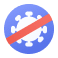
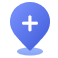
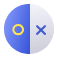
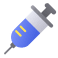

In [2]:
url = 'https://search.naver.com/search.naver?query=날씨'

html = requests.get(url)

soup = bs(html.text, 'html.parser')
soup

In [3]:
#!pip install selenium

In [4]:
# conda install -c conda-forge selenium

In [5]:
# 웹 드라이버 라이브러리
from selenium import webdriver

In [43]:
driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')

C:\Users\admin\AppData\Local\Temp\ipykernel_436\2421840669.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')


In [7]:
driver.get('https://www.naver.com')

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:u
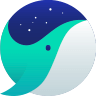
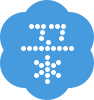

In [8]:
html = driver.page_source
html

In [9]:
html = '''
<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
    <h1> 우리동네시장</h1>
    <div class = 'sale'>
        <p id='fruits1' class='fruits'>
            <span class = 'name'> 바나나 </span>
            <span class = 'price'> 3000원 </span>
            <span class = 'inventory'> 500개 </span>
            <span class = 'store'> 가나다상회 </span>
            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
        </p>
    </div>
    <div class = 'prepare'>
        <p id='fruits2' class='fruits'>
            <span class ='name'> 파인애플 </span>
        </p>
    </div>
</body>
</html>
'''

In [13]:
soup = bs(html, 'html.parser')
soup


<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

### HTML 정보 찾기 -> 태그 이름 활용

In [16]:
# 태그 중에 span 이라는 이름을 가지는 모든 것 조회
soup.select('span')

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [18]:
soup.select('p')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [20]:
# id 속성의 값이 fruits1이 들어 있는 태그의 시작과 끝까지의 모든 태그 조회
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [21]:
# 클래스에 접근할때는 .을 붙인다
soup.select('.price')

[<span class="price"> 3000원 </span>]

In [22]:
# span태그에서 class가 name인 것을 조회
soup.select('span.name')

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [26]:
# fruits1이라는 id에서 자식인 span태그의 class가 name인 것을 조회
soup.select('#fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [ ]:
# 태그명이 div 이면서 class 이름이 sale인 태그의 자식 중에 아이디 이름이 fruits1인
# 태그 밑에 있는 자식에 대한 태그명이 span이면서 클래스 이름이 name인 태그 모두 찾기

In [30]:
soup.select('div.sale > #fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [34]:
# 자손을 조회할때는 공백
soup.select('div.sale span.name')

[<span class="name"> 바나나 </span>]

In [33]:
soup.select('div.sale span.name')[0].text

' 바나나 '

In [35]:
soup.select('div.sale span.name')[0]['class']

['name']

In [39]:
soup.select('a')

[<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>]

In [42]:
soup.select('a')[0]['href']

'http://bit.ly/forPlaywithData'

# 멜론 노래 순위 정보 크롤링

In [44]:
url = 'http://www.melon.com/chart/index.htm'

In [46]:
driver.get(url)
html = driver.page_source
html

'<html lang="ko"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/chart/index.htm">\n\t<

In [57]:
soup = bs(html, 'html.parser')
soup

<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="og:site_name"/

In [72]:
song_singer_list = soup.select('div.wrap_song_info > div > span > a')
song_singer_list

[<a href="javascript:melon.play.playSong('1000002721',34847378);" title="LOVE DIVE 재생">LOVE DIVE</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34754292);" title="TOMBOY 재생">TOMBOY</a>,
 <a href="javascript:melon.link.goArtistDetail('2137482');" title="(여자)아이들 - 페이지 이동">(여자)아이들</a>,
 <a href="javascript:melon.play.playSong('1000002721',34997078);" title="That That (prod. &amp; feat. SUGA of BTS) 재생">That That (prod. &amp; feat. SUGA of BTS)</a>,
 <a href="javascript:melon.link.goArtistDetail('3865');" title="싸이 (PSY) - 페이지 이동">싸이 (PSY)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34657844);" title="사랑인가 봐 재생">사랑인가 봐</a>,
 <a href="javascript:melon.link.goArtistDetail('839732');" title="멜로망스 - 페이지 이동">멜로망스</a>,
 <a href="javascript:melon.play.playSong('1000002721',35272060);" title="Yet To Come 재생">Yet To Come</a>,
 <a href="javascript:melon.link.goArtistDetail

In [84]:
song_list = []
sing_list = []

In [85]:
for i in range(0, 20, 2):
    song_list.append(song_singer_list[i].text)

In [87]:
song_list

['LOVE DIVE',
 'TOMBOY',
 'That That (prod. & feat. SUGA of BTS)',
 '사랑인가 봐',
 'Yet To Come',
 '우리들의 블루스',
 '사랑은 늘 도망가',
 '정이라고 하자 (Feat. 10CM)',
 '다시 만날 수 있을까',
 '봄여름가을겨울 (Still Life)']

In [89]:
for i in range(1, 20, 2):
    sing_list.append(song_singer_list[i].text)

In [92]:
sing_list

['IVE (아이브)',
 '(여자)아이들',
 '싸이 (PSY)',
 '멜로망스',
 '방탄소년단',
 '임영웅',
 '임영웅',
 'BIG Naughty (서동현)',
 '임영웅',
 'BIGBANG (빅뱅)']

In [100]:
rank = ['{}위'.format(i) for i in range(1, 11)]
rank

['1위', '2위', '3위', '4위', '5위', '6위', '7위', '8위', '9위', '10위']

In [103]:
top_10_df = pd.DataFrame({'순위' : rank, '노래제목' : song_list, '가수' : sing_list})

In [104]:
top_10_df

,순위,노래제목,가수
0,1위,LOVE DIVE,IVE (아이브)
1,2위,TOMBOY,(여자)아이들
2,3위,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
3,4위,사랑인가 봐,멜로망스
4,5위,Yet To Come,방탄소년단
5,6위,우리들의 블루스,임영웅
6,7위,사랑은 늘 도망가,임영웅
7,8위,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현)
8,9위,다시 만날 수 있을까,임영웅
9,10위,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)


# 강사님 풀이

In [138]:
# BeautifulSoup을 이용한 웹크롤링

# 읽어올 페이지
url = 'http://www.melon.com/chart/index.htm'

# 웹드라이버 열기
driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')

# 웹드라이버로 url열어서 소스코드 문자형태로 받아오기
driver.get(url)
html = driver.page_source

# BeautifulSoup을 이용하여 html 적용
soup = bs(html, 'html.parser')

# 1~10위까지 정보 받아오기
songs = soup.select('tr')[1 : 11]

songs[0].select('div.t_center > span.rank')[0].text
songs[0].select('div.ellipsis.rank01 > span > a')[0].text
songs[0].select('div.ellipsis.rank02 > a')[0].text
songs[0].select('button.button_etc > span.cnt')[0].text.split('\n')[2]

list_df = []

for i in songs:
    rank = i.select('div.t_center > span.rank')[0].text
    title = i.select('div.ellipsis.rank01 > span > a')[0].text
    singer = i.select('div.ellipsis.rank02 > a')[0].text
    like = i.select('button.button_etc > span.cnt')[0].text.split('\n')[2]
    
    list_df.append([rank, title, singer, like])

df = pd.DataFrame(list_df, columns=['순위', '제목', '가수', '좋아요!'])
df

10


,순위,제목,가수,좋아요!
0,1,LOVE DIVE,IVE (아이브),"143,913"
1,2,TOMBOY,(여자)아이들,"187,946"
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),"97,369"
3,4,사랑인가 봐,멜로망스,"132,345"
4,5,Yet To Come,방탄소년단,"98,064"
5,6,우리들의 블루스,임영웅,"64,803"
6,7,사랑은 늘 도망가,임영웅,"164,694"
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),"126,441"
8,9,다시 만날 수 있을까,임영웅,"52,375"
9,10,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),"274,068"


In [143]:
# Selenium을 이용한 웹크롤링

# 읽어올 페이지
url = 'http://www.melon.com/chart/index.htm'

# 웹드라이버 열기
driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')

# 웹드라이버로 url열어서 소스코드 문자형태로 받아오기
driver.get(url)

# html = driver.page_source

# # BeautifulSoup을 이용하여 html 적용
# soup = bs(html, 'html.parser')

# 1~10위까지 정보 받아오기
songs = driver.find_elements_by_css_selector('tr')[1 : 11]

list_df = []

for i in songs:
    rank = i.find_elements_by_css_selector('div.t_center > span.rank')[0].text
    title = i.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text
    singer = i.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text
    like = i.find_elements_by_css_selector('button.button_etc > span.cnt')[0].text.split('\n')[-1]
    
    list_df.append([rank, title, singer, like])

df = pd.DataFrame(list_df, columns=['순위', '제목', '가수', '좋아요!'])
df

C:\Users\admin\AppData\Local\Temp\ipykernel_436\2595091481.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')
C:\Users\admin\AppData\Local\Temp\ipykernel_436\2595091481.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  songs = driver.find_elements_by_css_selector('tr')[1 : 11]
C:\Users\admin\AppData\Local\Temp\ipykernel_436\2595091481.py:23: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  rank = i.find_elements_by_css_selector('div.t_center > span.rank')[0].text
C:\Users\admin\AppData\Local\Temp\ipykernel_436\2595091481.py:24: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  title = i.find_element

,순위,제목,가수,좋아요!
0,1,LOVE DIVE,IVE (아이브),"144,062"
1,2,TOMBOY,(여자)아이들,"188,047"
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),"97,432"
3,4,사랑인가 봐,멜로망스,"132,402"
4,5,우리들의 블루스,임영웅,"64,852"
5,6,Yet To Come,방탄소년단,"98,216"
6,7,사랑은 늘 도망가,임영웅,"164,714"
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),"126,555"
8,9,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),"274,102"
9,10,나의 X에게,경서,"72,833"
